In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Utilities.SequentialLearning.EWC_Methods.EWC_Methods import EWC_Method
from Utilities.Interpretability.ModelAugmentation import AggregationLevel, AggregationMethod

In [4]:
data_file = "data/cifar10_medium_validation_loss_over_threshold.csv"
df = pd.read_csv(data_file, index_col="Unnamed: 0")
df

,Epoch,EWC Method,Aggregation Level,Threshold Value,Loss,Validation Loss
0,5,FISHER_MATRIX,NO_AGGREGATION,0.00,0.866979,0.979571
1,5,FISHER_MATRIX,NO_AGGREGATION,0.04,0.866580,0.979861
2,5,FISHER_MATRIX,NO_AGGREGATION,0.08,0.863429,0.978296
3,5,FISHER_MATRIX,NO_AGGREGATION,0.12,0.861961,0.973872
4,5,FISHER_MATRIX,NO_AGGREGATION,0.16,0.860800,0.969991
...,...,...,...,...,...,...
1295,25,RANDOM,CONV_FILTER,0.84,2.308533,2.308608
1296,25,RANDOM,CONV_FILTER,0.88,2.308389,2.308364
1297,25,RANDOM,CONV_FILTER,0.92,2.305713,2.305665
1298,25,RANDOM,CONV_FILTER,0.96,2.302805,2.302810


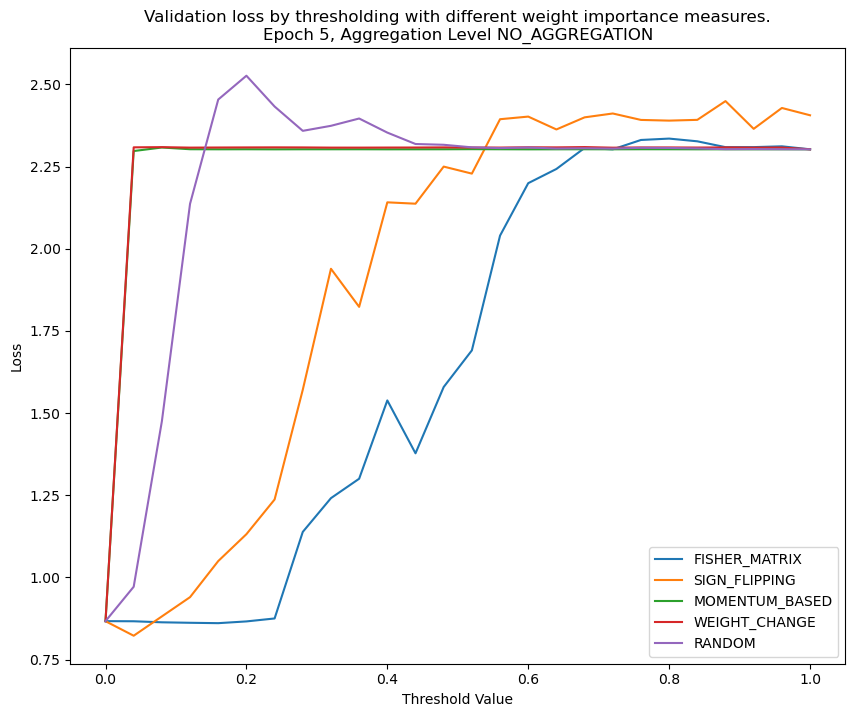

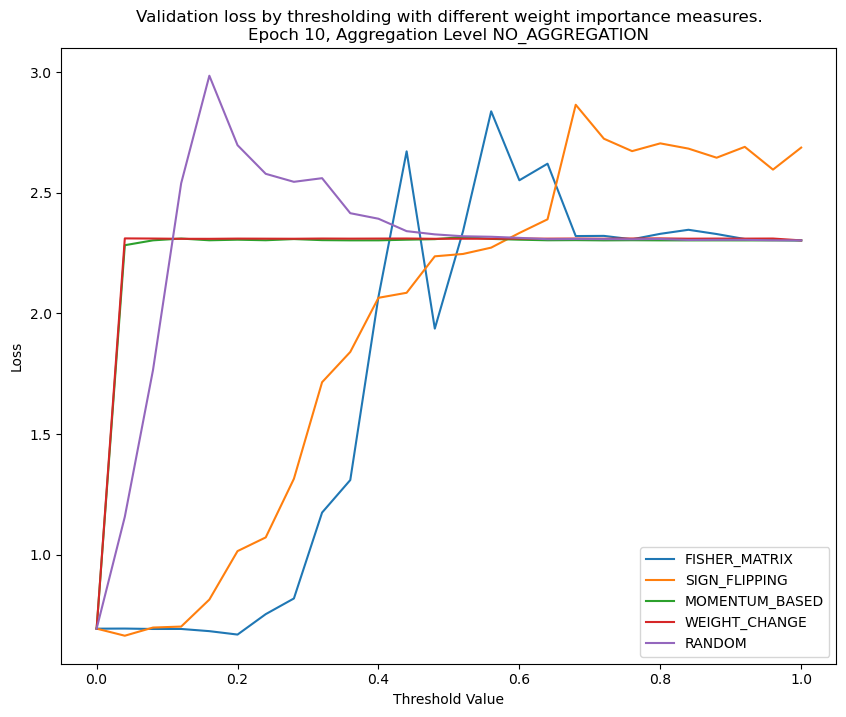

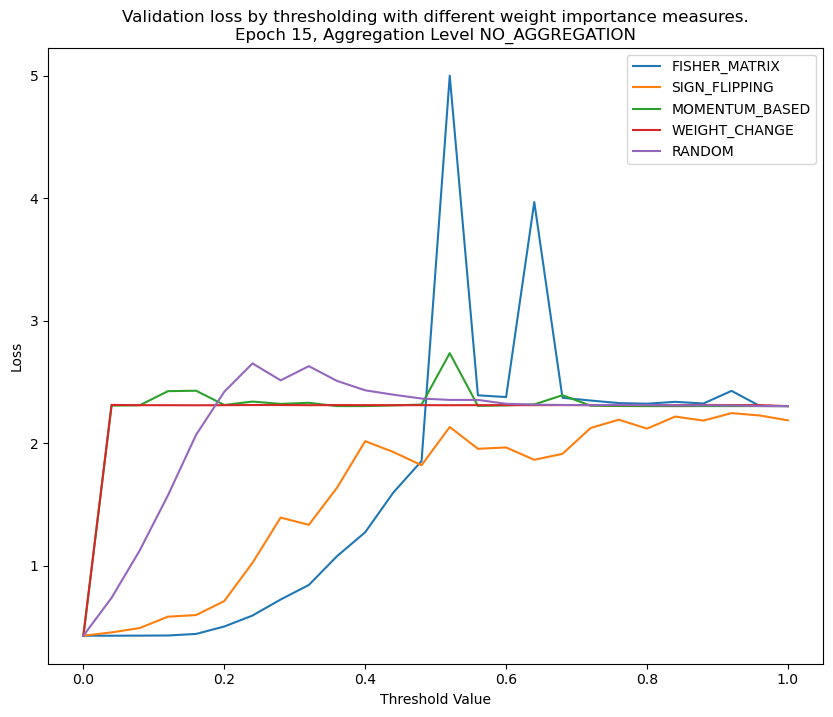

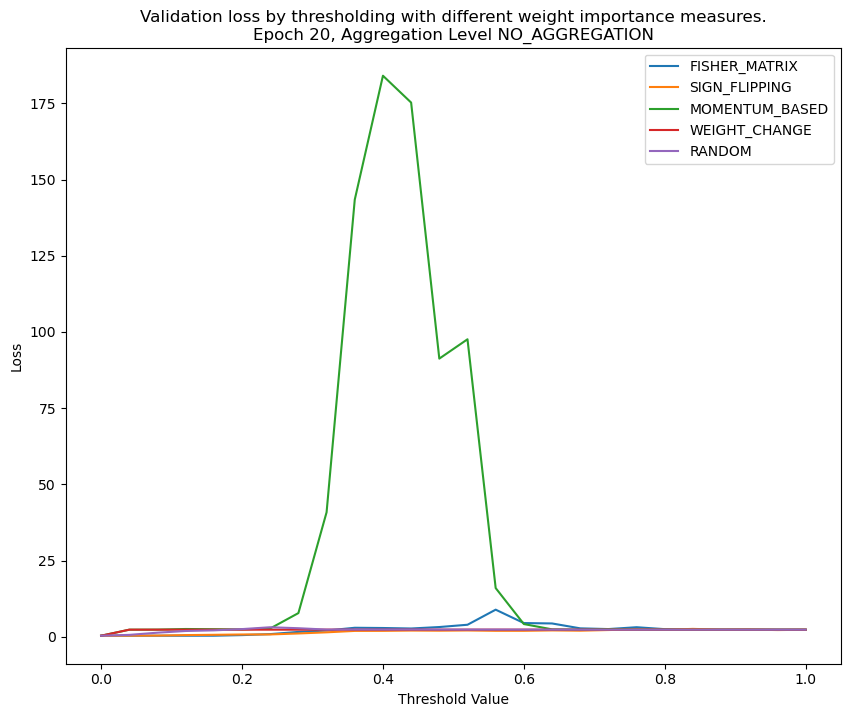

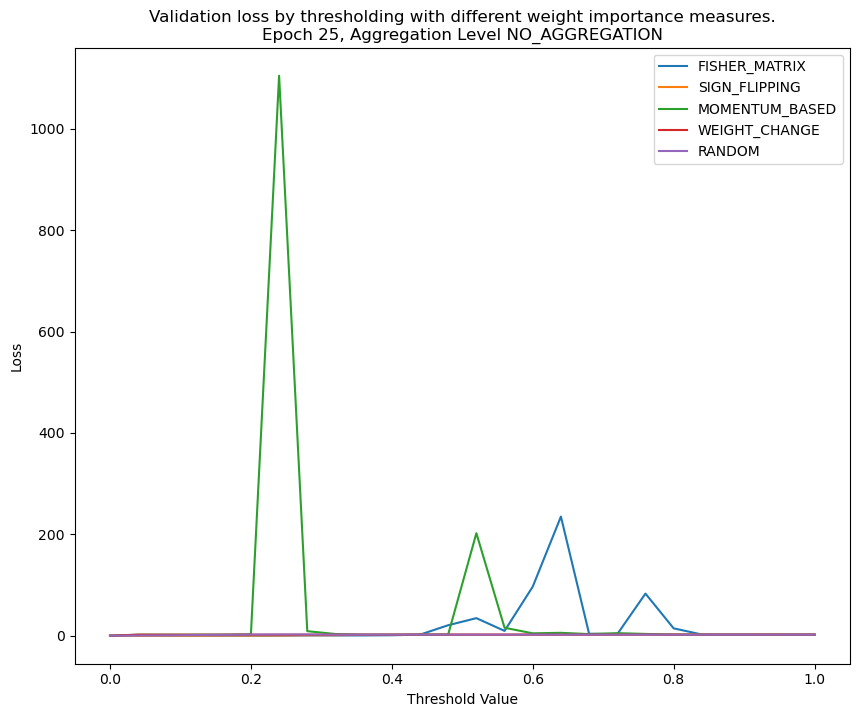

In [5]:
# Each plot is a snapshot of the model at a specific epoch - and all lines contain EWC methods with the same aggregation level

target_methods = [
    EWC_Method.FISHER_MATRIX,
    EWC_Method.SIGN_FLIPPING,
    EWC_Method.MOMENTUM_BASED,
    EWC_Method.WEIGHT_CHANGE,
    EWC_Method.RANDOM,
]
target_methods = [method.name for method in target_methods]
target_aggregation_level = AggregationLevel.NO_AGGREGATION.name

for epoch in df["Epoch"].unique():
    fig = plt.figure(figsize=(10,8))
    epoch_data = df.copy()
    epoch_data = epoch_data[epoch_data["Epoch"]==epoch]
    epoch_data = epoch_data[epoch_data["Aggregation Level"]==target_aggregation_level]
    for ewc_method in target_methods:
        curr_data = epoch_data[epoch_data["EWC Method"]==ewc_method]
        # display(curr_data)
        plt.plot(curr_data["Threshold Value"], curr_data["Loss"], label=f"{ewc_method}")
    plt.title(f"Validation loss by thresholding with different weight importance measures.\nEpoch {epoch}, Aggregation Level {target_aggregation_level}")
    # plt.ylim(0, 2*np.log(10))
    plt.xlabel("Threshold Value")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

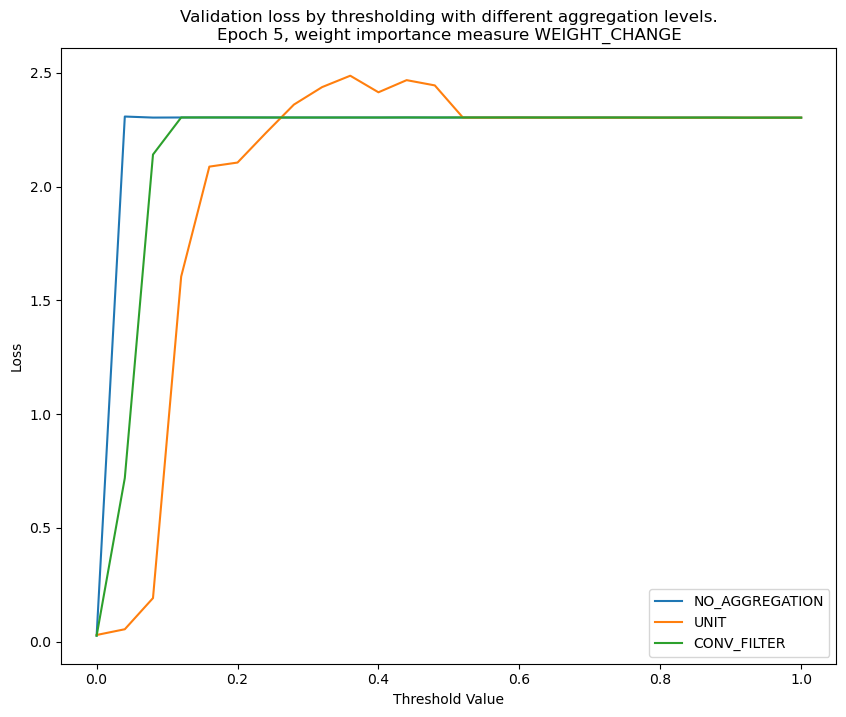

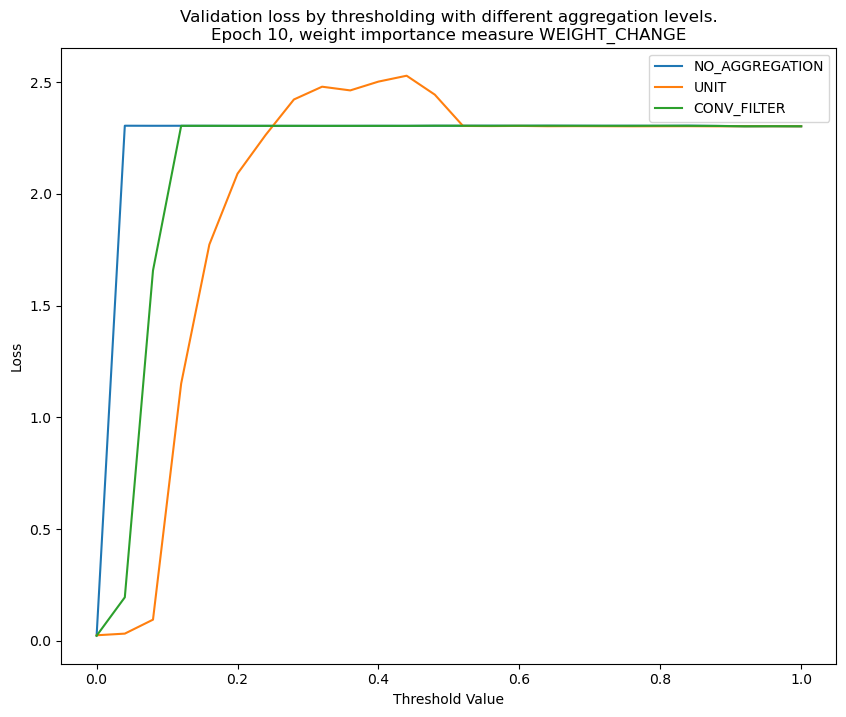

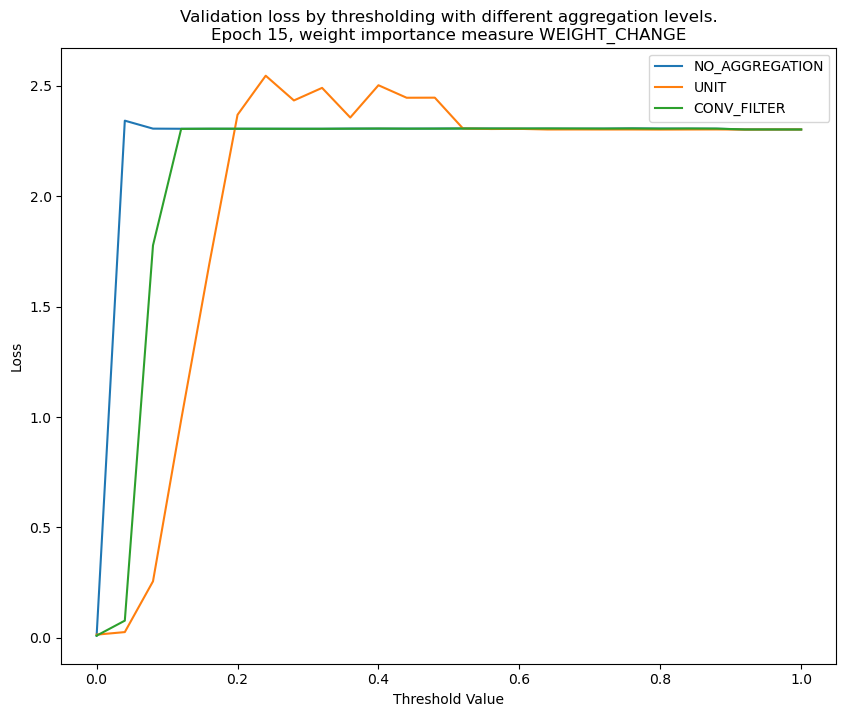

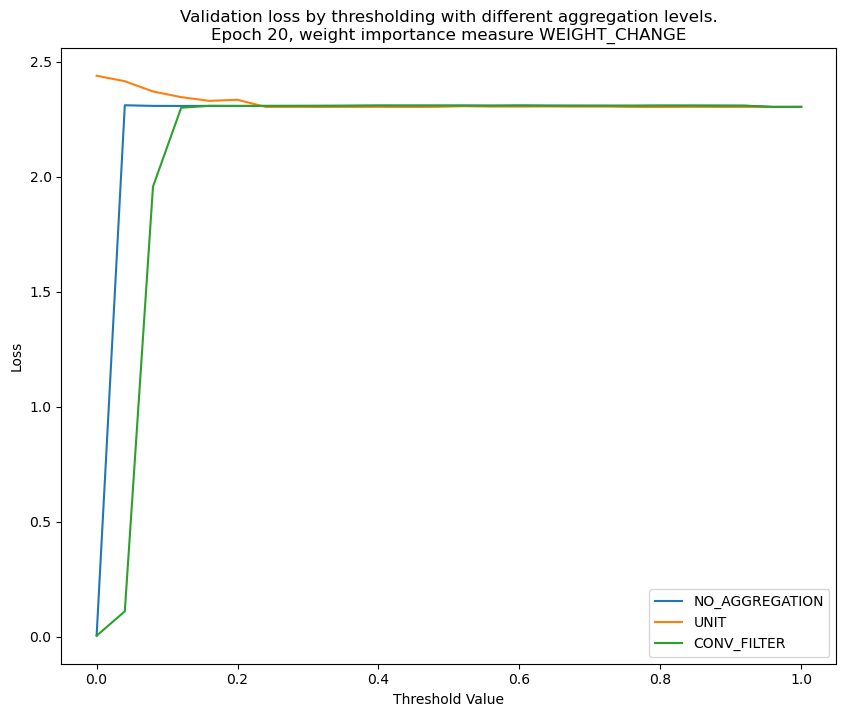

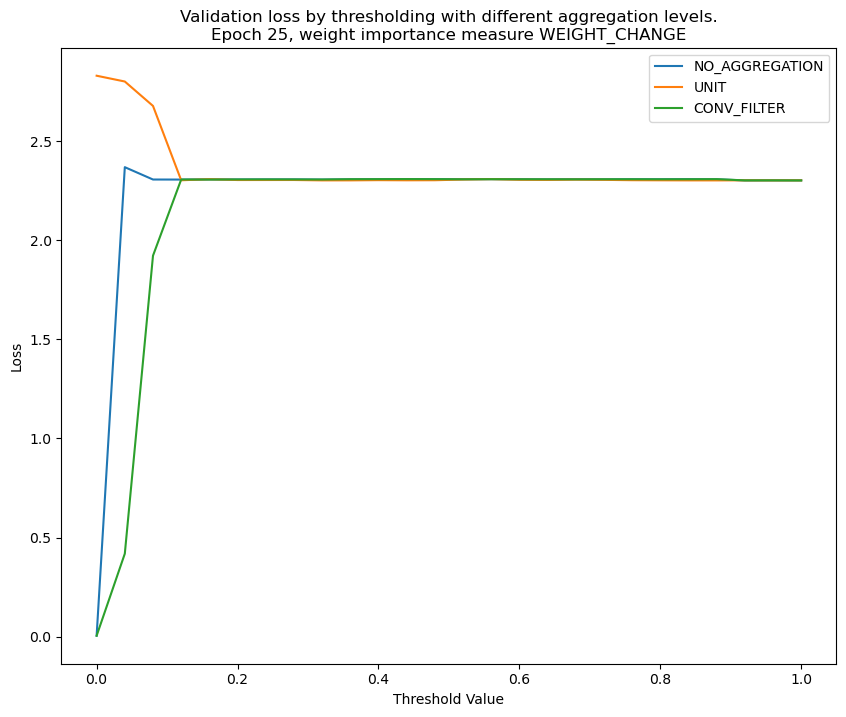

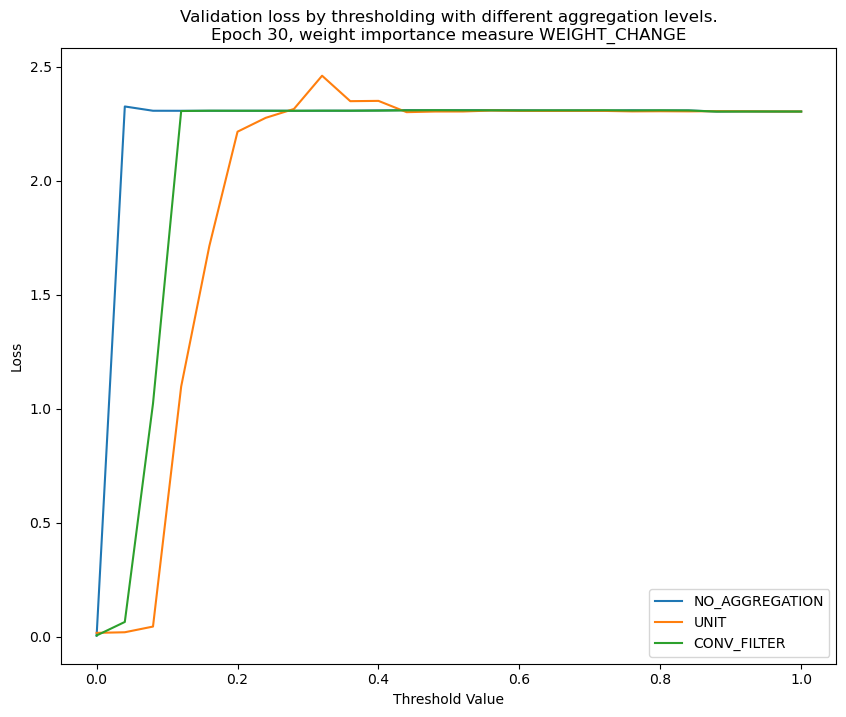

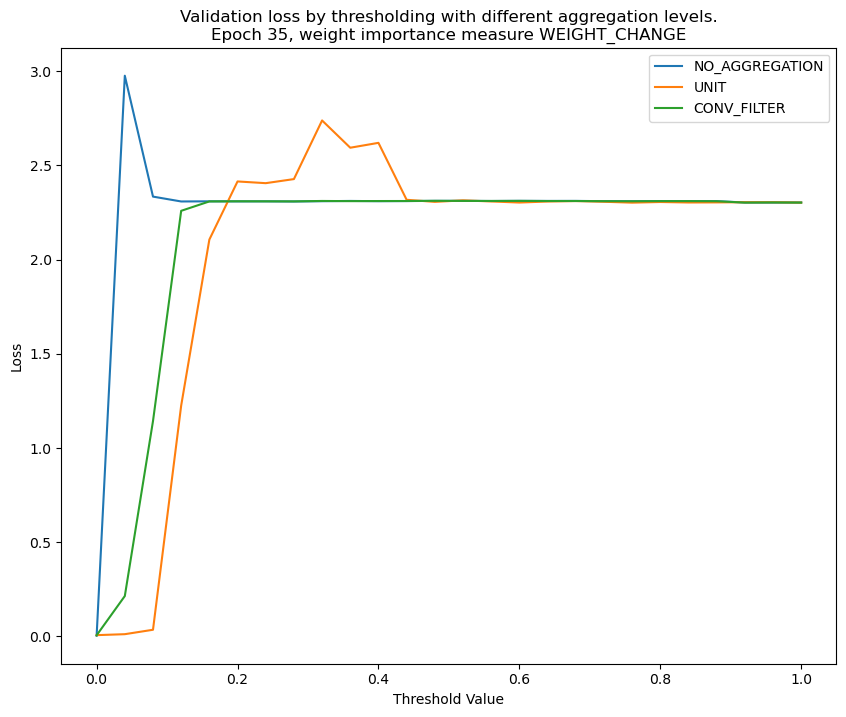

In [22]:
# Each plot is a snapshot of different aggregation levels - all lines are different aggregation levels with the same EWC method

target_ewc_method = EWC_Method.WEIGHT_CHANGE.name
target_aggregation_levels = [
    AggregationLevel.NO_AGGREGATION,
    AggregationLevel.UNIT,
    AggregationLevel.CONV_FILTER
]
target_aggregation_levels = [level.name for level in target_aggregation_levels]

for epoch in df["Epoch"].unique():
    fig = plt.figure(figsize=(10,8))
    epoch_data = df.copy()
    epoch_data = epoch_data[epoch_data["Epoch"]==epoch]
    epoch_data = epoch_data[epoch_data["EWC Method"]==target_ewc_method]
    for aggregation_level in target_aggregation_levels:
        curr_data = epoch_data[epoch_data["Aggregation Level"]==aggregation_level]
        # display(curr_data)
        plt.plot(curr_data["Threshold Value"], curr_data["Loss"], label=f"{aggregation_level}")
    plt.title(f"Validation loss by thresholding with different aggregation levels.\nEpoch {epoch}, weight importance measure {target_ewc_method}")
    plt.xlabel("Threshold Value")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()